# Проект по предсказанию прекращения пользования услуг клиентом в сфере телекоммуникации.

# Описание проекта

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.



Оператор предоставляет два основных типа услуг:

Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.

Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).

Также доступны такие услуги:

*   Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
*   Выделенная линия технической поддержки (TechSupport);
*   Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
*   Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

Целью проекта является создание модели предсказания ухода клиента. При проверке качества моделей ориентироваться будем на метрику ROC-AUC > 0.85

# установки модулей

In [6]:
!pip install jupyter_contrib_nbextensions


In [7]:
!jupyter contrib nbextension install

[I 16:44:01 InstallContribNbextensionsApp] jupyter contrib nbextension install 
[I 16:44:01 InstallContribNbextensionsApp] Installing jupyter_contrib_nbextensions nbextension files to jupyter data directory
[I 16:44:01 InstallContribNbextensionsApp] Installing /usr/local/lib/python3.10/dist-packages/jupyter_contrib_nbextensions/nbextensions/livemdpreview -> livemdpreview
[I 16:44:01 InstallContribNbextensionsApp] Up to date: /usr/local/share/jupyter/nbextensions/livemdpreview/livemdpreview.js
[I 16:44:01 InstallContribNbextensionsApp] Up to date: /usr/local/share/jupyter/nbextensions/livemdpreview/livemdpreview.yml
[I 16:44:01 InstallContribNbextensionsApp] - Validating: OK
[I 16:44:01 InstallContribNbextensionsApp] Installing /usr/local/lib/python3.10/dist-packages/jupyter_contrib_nbextensions/nbextensions/move_selected_cells -> move_selected_cells
[I 16:44:01 InstallContribNbextensionsApp] Up to date: /usr/local/share/jupyter/nbextensions/move_selected_cells/main.js
[I 16:44:01 Insta

In [10]:
!jupyter nbextension enable toc2/main

Enabling notebook extension toc2/main...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [8]:
!pip install scikit-learn==1.1.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 47.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


# предварительный EDA

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [ ]:
RANDOM_STATE = 30723
t_size = 0.25

In [ ]:
df_contract = pd.read_csv('contract_new.csv')
df_internet = pd.read_csv('internet_new.csv')
df_personal = pd.read_csv('personal_new.csv')
df_phone = pd.read_csv('phone_new.csv')

In [ ]:
'''
df_contract = pd.read_csv('/dataset/contract_new.csv')
df_internet = pd.read_csv('/dataset/internet_new.csv')
df_personal = pd.read_csv('/dataset/personal_new.csv')
df_phone = pd.read_csv('/dataset/phone_new.csv')
'''

"\ndf_contract = pd.read_csv('/dataset/contract_new.csv')\ndf_internet = pd.read_csv('/dataset/internet_new.csv')\ndf_personal = pd.read_csv('/dataset/personal_new.csv')\ndf_phone = pd.read_csv('/dataset/phone_new.csv')\n"

## Таблица Contract

In [ ]:
df_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


In [ ]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


в первой таблице 7 тыс объектов, пустых нету значений.

*  customerID - id клиента
*  BeginDate  - дата подключения клиента, нужен перевод в дату
*  EndDate  - дата отключения клиентом от услуг(отказ от услуг). Это будет целевым признаком, нужен перевод в логический тип, если есть дата 1(клиент ушел), если нету - 0
*  Type  -  тип оплаты, перевод в классы или логический тип если типов 2.
*   PaperlessBilling  - безналичный расчет, но перевести все равно надо в логический тип, тут только 2 варианта
*  PaymentMethod - способ оплаты, перевод в логический тип через OHE
*   MonthlyCharges  - ежемесячные траты на услуги
*   TotalCharges - суммарная оплата с доп услугами за все время, перевод в float


Проверка на дубликаты и пропуски.

In [ ]:
len(df_contract.dropna())

7043

In [ ]:
df_contract.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Дубликатов и пропусков нету, объектов столько же. Проверка уникальных значений.

In [ ]:
for i in df_contract.drop(['customerID','BeginDate','EndDate','MonthlyCharges','TotalCharges'], axis=1).columns:
    print(i,'\n',df_contract[i].unique())

Type 
 ['Month-to-month' 'One year' 'Two year']
PaperlessBilling 
 ['Yes' 'No']
PaymentMethod 
 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


Столбец Type также переведем через OHE позже.

Столб общей суммы оплат переведем сразу для анализа. При переводе также оказывается, что там есть пустые значения в виде строки, их заполним заглушкой, а после медианой.

In [ ]:
for i in range(len(df_contract)):
    if ' ' in df_contract.loc[i,'TotalCharges']:
        print('yes')
        print(i)
        df_contract.loc[i,'TotalCharges'] = '0'


yes
488
yes
753
yes
936
yes
1082
yes
1340
yes
3331
yes
3826
yes
4380
yes
5218
yes
6670
yes
6754


In [ ]:
df_contract['TotalCharges'] = df_contract['TotalCharges'].astype(float)

In [ ]:
for i in range(len(df_contract)):
    if df_contract.loc[i,'TotalCharges'] == 0:
        print('yes')
        print(i)

yes
488
yes
753
yes
936
yes
1082
yes
1340
yes
3331
yes
3826
yes
4380
yes
5218
yes
6670
yes
6754


Как видно, строки те же самые, то есть чисто 0 не добавилось.

In [ ]:
for i in range(len(df_contract)):
    if df_contract.loc[i,'TotalCharges'] == 0:
        df_contract.loc[i,'TotalCharges'] = df_contract.loc[i,'MonthlyCharges']
        print(df_contract.iloc[i])

customerID                         4472-LVYGI
BeginDate                          2020-02-01
EndDate                                    No
Type                                 Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                            52.55
Name: 488, dtype: object
customerID            3115-CZMZD
BeginDate             2020-02-01
EndDate                       No
Type                    Two year
PaperlessBilling              No
PaymentMethod       Mailed check
MonthlyCharges             20.25
TotalCharges               20.25
Name: 753, dtype: object
customerID            5709-LVOEQ
BeginDate             2020-02-01
EndDate                       No
Type                    Two year
PaperlessBilling              No
PaymentMethod       Mailed check
MonthlyCharges             80.85
TotalCharges               80.85
Name: 936, dtype: object
customerID            4367-NU

Если детальнее рассмотреть, то это клиенты, которые только пришли, и соответственно ещё не производили оплаты. Медианой их заполнять было бы неправильно. Заполнил месячным значением.

array([[<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

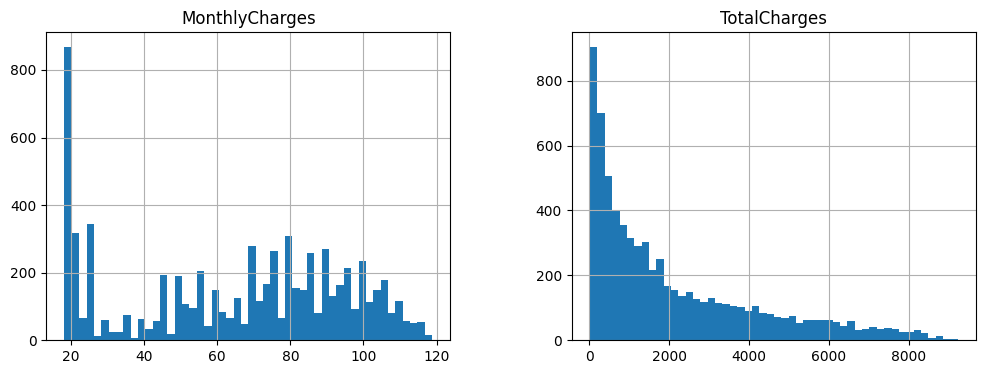

In [ ]:
df_contract.hist(bins=50, grid= True, figsize=(12,4))

Распределения оплат по месяцам и суммарной не идеальны, и сдвинуты ближе к 0, но и не равны ему. А также видно, что выбросы в данных о платежах отсутствуют. Ниже посмотрим на распределение логических параметров.

In [ ]:
df_contract_log = df_contract.drop(['MonthlyCharges','BeginDate','EndDate','customerID','TotalCharges'],axis=1)

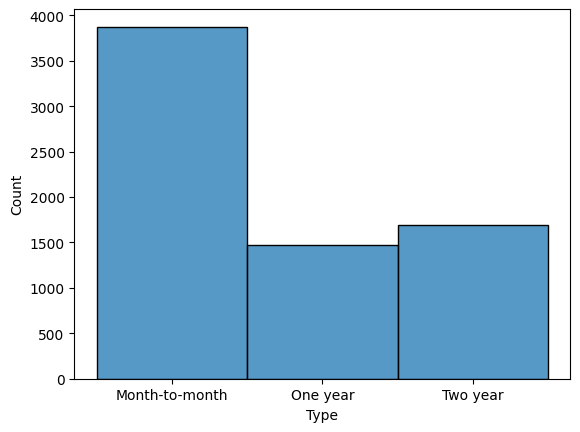

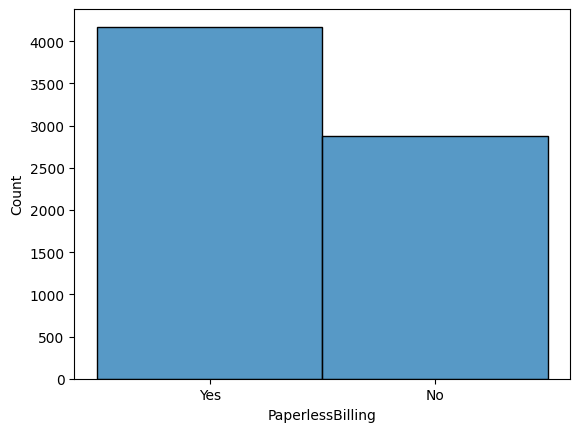

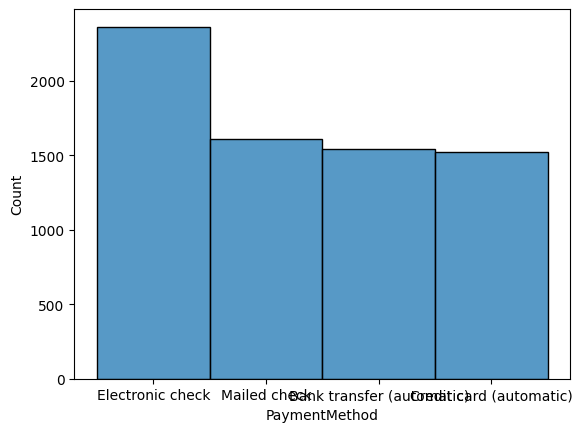

In [ ]:
for i in df_contract_log.columns:
    sns.histplot(df_contract_log[i], bins=100)
    plt.show()

<Axes: >

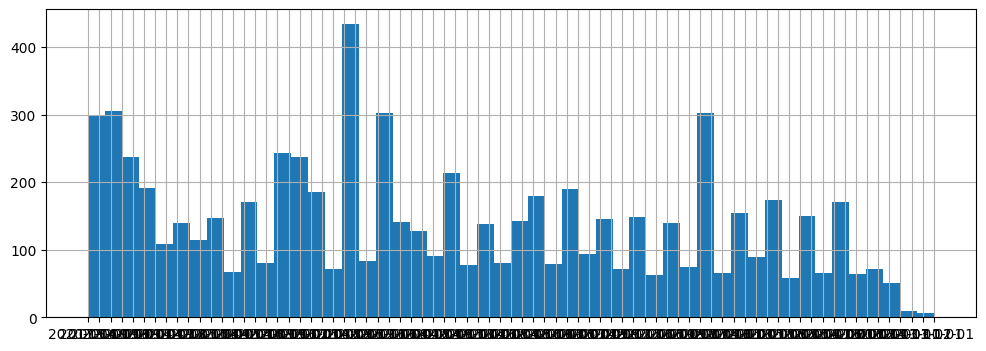

In [ ]:
df_contract['BeginDate'].hist(bins=50, grid= True, figsize=(12,4))

In [ ]:
df_contract[['customerID','BeginDate']].groupby('BeginDate').count().sort_values('BeginDate').head(10)

,customerID
BeginDate,
2013-10-01,3
2013-11-01,2
2013-12-01,3
2014-01-01,7
2014-02-01,366
2014-03-01,178
2014-04-01,114
2014-05-01,98
2014-06-01,97


In [ ]:
df_contract[['customerID','BeginDate']].groupby('BeginDate').count().sort_values('customerID', ascending=False).head(10)

,customerID
BeginDate,
2014-02-01,366
2019-09-01,237
2019-10-01,237
2019-11-01,237
2020-01-01,233
2019-12-01,220
2014-03-01,178
2019-07-01,156
2019-08-01,146


Как видно из данных,с фервраля по май 2014 года был небывалый рост числа новых клиентов, при том что это начало работы компании. С чем он связан? А также очень много клиентов подключалось во вторую половину 2019. Если проводились ПР компании, то они были самыми эффективными.

В первой таблице также созданим новый параметр, равный числу месяцев, сколько клиент пользуется услугами.

## Таблица Internet

In [ ]:
df_internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [ ]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [ ]:
len(df_internet.dropna())

5517

тут у нас значений меньше, 5,5 тыс, хотя нам нужно связывать данные по id клиента. Тут таблица по сути о том, какой тип интернет подключения и  какие доп услуги есть у клиентов.

*  customerID - id клиента
*  InternetService  - тип интернет подключаения, перевод через OHE
*  OnlineSecurity  - есть ли онлайн защита, перевод в лог тип.
*  OnlineBackup  -  есть ли онлайн бэкап, перевод в лог тип.
*   DeviceProtection  - есть ли защита устройства, перевод в лог тип.
*  TechSupport - есть ли тех поддержка, перевод в лог тип.
*  StreamingTV  - есть ли стримТВ, перевод в лог тип.
*  StreamingMovies - есть ли стрим фильмов, перевод в лог тип.


Проверка на уникальность.

In [ ]:
for i in df_internet.drop(['customerID'], axis=1).columns:
    print(i,'\n',df_internet[i].unique())

InternetService 
 ['DSL' 'Fiber optic']
OnlineSecurity 
 ['No' 'Yes']
OnlineBackup 
 ['Yes' 'No']
DeviceProtection 
 ['No' 'Yes']
TechSupport 
 ['No' 'Yes']
StreamingTV 
 ['No' 'Yes']
StreamingMovies 
 ['No' 'Yes']


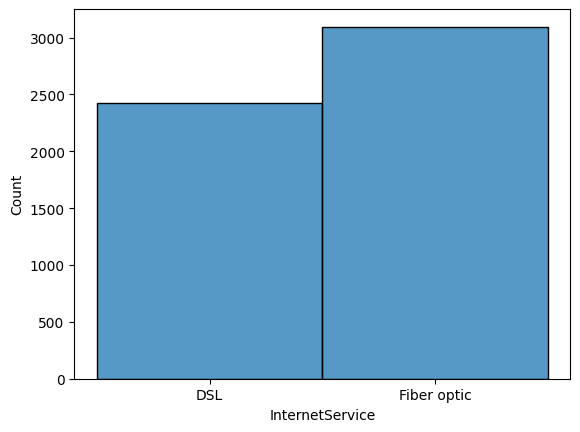

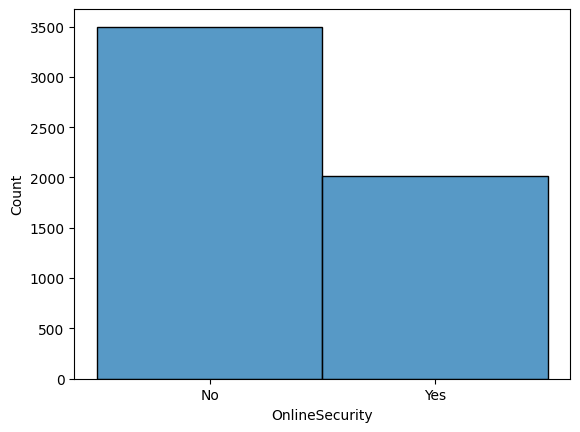

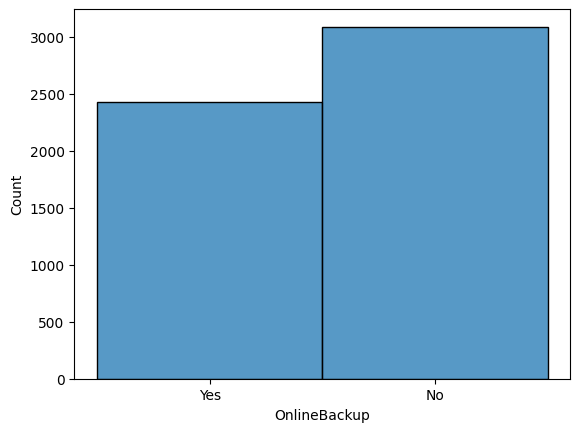

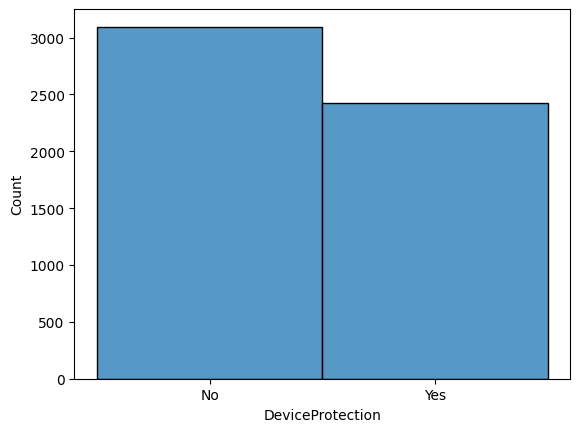

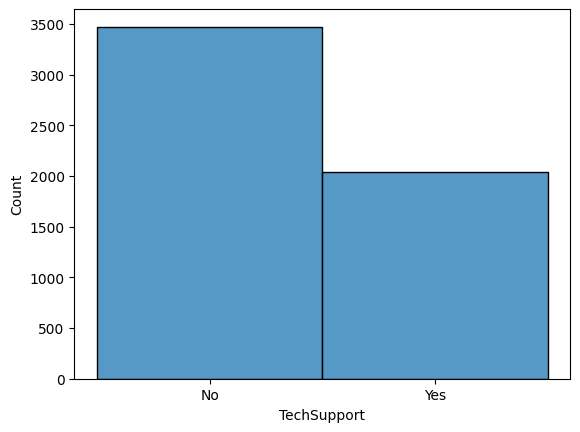

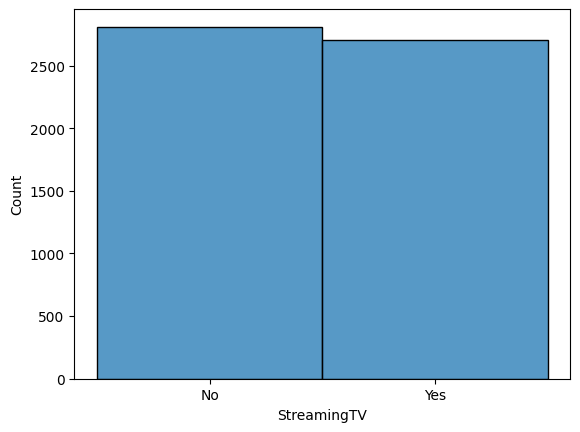

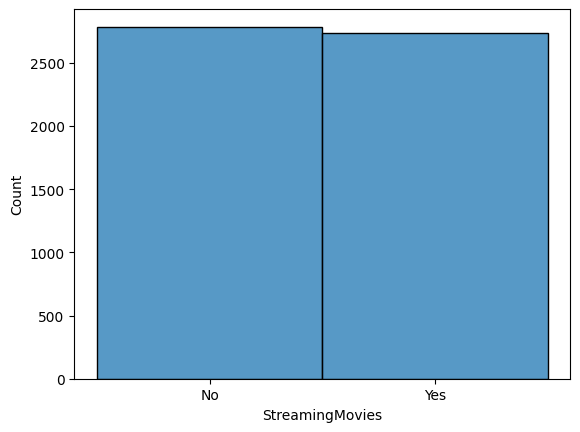

In [ ]:
for i in df_internet.drop(['customerID'], axis=1).columns:
    sns.histplot(df_internet[i], bins=100)
    plt.show()

## Таблица Personal

In [ ]:
df_personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [ ]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [ ]:
len(df_personal.dropna())

7043

In [ ]:
for i in df_personal.drop(['customerID'], axis=1).columns:
    print(i,'\n',df_personal[i].unique())

gender 
 ['Female' 'Male']
SeniorCitizen 
 [0 1]
Partner 
 ['Yes' 'No']
Dependents 
 ['No' 'Yes']


Тут  значений 7 тыс, нулевых нету. Тут таблица о самих клиентах.

*  customerID - id клиента
*  gender  - гендер, перевод в лог тип.
*  SeniorCitizen  - пенсионный статус, перевод в лог тип.
*  Partner  -  наличие супруга, перевод в лог тип.
*   Dependents  - наличие иждевенцев, перевод в лог тип.


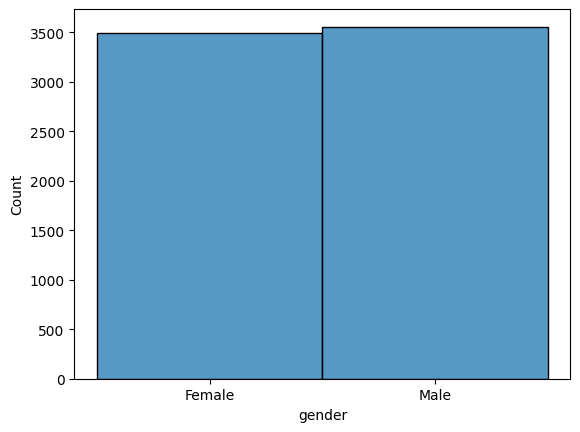

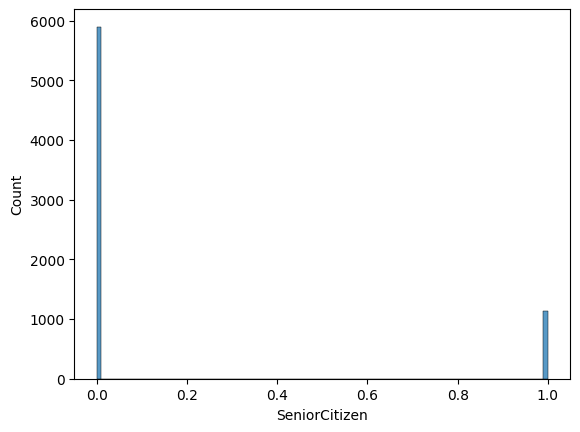

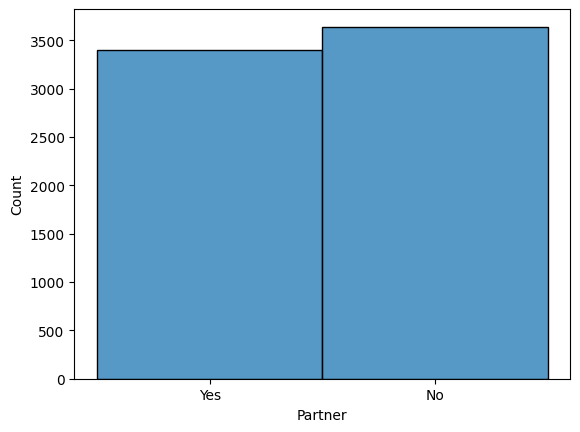

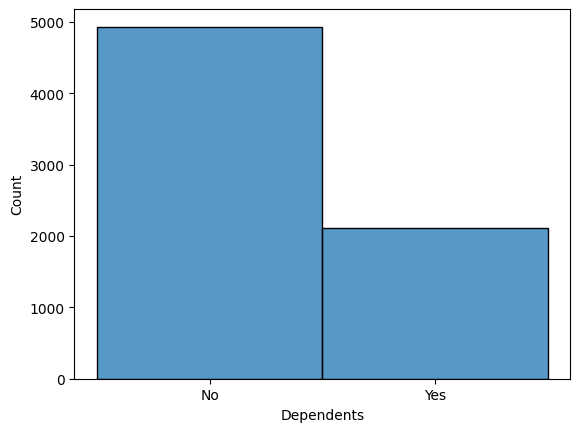

In [ ]:
for i in df_personal.drop(['customerID'], axis=1).columns:
    sns.histplot(df_personal[i], bins=100)
    plt.show()

Как видно, пенсионеры, и те кто имеет иждевенцев, пользуются услугами меньше. И эти два параметра дисбалансированны.

## Таблица Phone

In [ ]:
df_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [ ]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


Тут  значений 6,3 тыс, нулевых нету. Тут таблица о том, есть ли множественное подключение линий у клиента.

*  customerID - id клиента
*  MultipleLines  - мультиподключение или нет, перевод в лог тип.



In [ ]:
df_phone['MultipleLines'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
len(df_phone.dropna())

6361

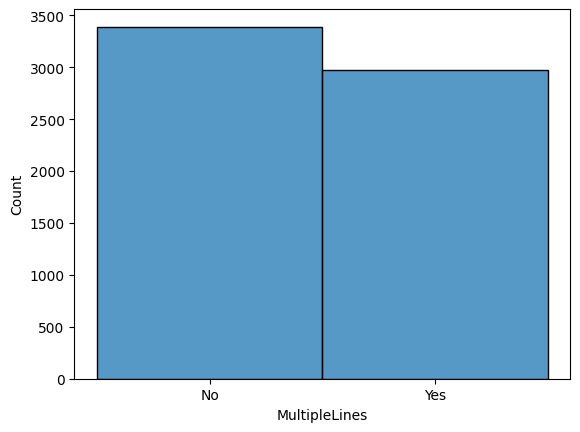

In [ ]:
sns.histplot(df_phone['MultipleLines'], bins=100)
plt.show()

# Вывод предварительного EDA

В целом все данные в порядке. Нигде не было дубликатов или пустых значений. Единственное, что если объединить таблицы, то всего у нас есть меньше 5,5 тыс полноценных объектов с уникальными клиентами. То есть есть те, у кого только интернет или телефон подключен, для этого добавим ещё 2 признака в предобработке в общую таблицу.

Также мы добавим признак равный числу месяцев, сколько абонент пользовался услугами, и выделим классы абонентов.

Есть несколько новых клиентов, у них суммарный платеж был 0, но я поставил туда месячное значение.

С фервраля по май 2014 года, и во вторую половину 2019 был большой рост числа новых клиентов. Если проводились ПР компании, то они были самыми эффективными.

Есть некоторый дисбаланс в классах Пенсионеры и Имеют ли иждевенцев. И также ясно, что и те и другие пользуются услугами меньше других. Также Онлайн безопасностью и тех поддержкой пользуются значительно меньше людей. И большинство предпочитает платить помесячно.

# План проекта



1.   Провести предварительный анализ по данным
2.   Сделать вывод на основе анализа данных
3.   Провести полноценную предобработку данных, соединить таблицы по Id Клиента. Добавить нужные признаки. провести EDA
4.   Разделить на тренировочную и тестовую выборки. Преобразовать категориальные признаки методом OHE. А численные через масштабирование Scaler.
5.   Настроить и обучить 3 модели через кросс-валидацию и оценить их, выбрать лучшую
6.   Применить лучшую модель к тестовой выборке и оценить результат.
7.   Сделать итоговый вывод





# Предобработка данных

Совместим все таблицы в одну, на основе дат сделаем число месяцев, сколько человек является клиентом. Если в дате пропущено, считаем ее как актуальной(01.02.2020). Если ID клиента нету в таблице телефона или интернета, то в новые столбцы отвечающие за то и другое добавим 0.

## Объединение таблиц

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285398 sha256=fb7f6facdd7ce0add661a660325b6baa5a4e58bfae2a4301ade5cdf299834e67
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession


APP_NAME = 'sampleApp'
SPARK_URL = "local[*]"
# builder — англ. конструктор сессии
spark = SparkSession.builder.appName(APP_NAME).config('spark.ui.showConsoleProgress', 'false').getOrCreate()

contract = spark.createDataFrame(df_contract)

print(contract.describe().show())
contract.registerTempTable("contract")

+-------+----------+----------+----------+--------------+----------------+--------------------+-----------------+------------------+
|summary|customerID| BeginDate|   EndDate|          Type|PaperlessBilling|       PaymentMethod|   MonthlyCharges|      TotalCharges|
+-------+----------+----------+----------+--------------+----------------+--------------------+-----------------+------------------+
|  count|      7043|      7043|      7043|          7043|            7043|                7043|             7043|              7043|
|   mean|      null|      null|      null|          null|            null|                null|64.76169246059925| 2115.377573477211|
| stddev|      null|      null|      null|          null|            null|                null|30.09004709767848|2112.6788608347483|
|    min|0002-ORFBO|2013-10-01|2014-06-01|Month-to-month|              No|Bank transfer (au...|            18.25|             19.05|
|    max|9995-HOTOH|2020-02-01|        No|      Two year|            

/usr/local/lib/python3.10/dist-packages/pyspark/sql/dataframe.py:330: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


In [ ]:
personal = spark.createDataFrame(df_personal)

print(personal.describe().show())

personal.registerTempTable("personal")

+-------+----------+------+------------------+-------+----------+
|summary|customerID|gender|     SeniorCitizen|Partner|Dependents|
+-------+----------+------+------------------+-------+----------+
|  count|      7043|  7043|              7043|   7043|      7043|
|   mean|      null|  null|0.1621468124378816|   null|      null|
| stddev|      null|  null| 0.368611605610013|   null|      null|
|    min|0002-ORFBO|Female|                 0|     No|        No|
|    max|9995-HOTOH|  Male|                 1|    Yes|       Yes|
+-------+----------+------+------------------+-------+----------+

None


In [ ]:
all = spark.sql("SELECT * \
               FROM contract AS c \
               LEFT JOIN personal AS p \
               ON c.customerID = p.customerID")
all.registerTempTable("all")

In [ ]:
all_df = all.toPandas()

In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   float64
 8   customerID        7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 715.4+ KB


In [ ]:
all_df['customerID'].head()

,customerID,customerID
0,3668-QPYBK,3668-QPYBK
1,6234-RAAPL,6234-RAAPL
2,1894-IGFSG,1894-IGFSG
3,6982-SSHFK,6982-SSHFK
4,5859-HZYLF,5859-HZYLF


In [ ]:
all_df = all_df.T.drop_duplicates().T

In [ ]:
phone = spark.createDataFrame(df_phone)

print(phone.describe().show())

phone.registerTempTable("phone")

+-------+----------+-------------+
|summary|customerID|MultipleLines|
+-------+----------+-------------+
|  count|      6361|         6361|
|   mean|      null|         null|
| stddev|      null|         null|
|    min|0002-ORFBO|           No|
|    max|9993-LHIEB|          Yes|
+-------+----------+-------------+

None


/usr/local/lib/python3.10/dist-packages/pyspark/sql/dataframe.py:330: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


In [ ]:
all = spark.createDataFrame(all_df)

print(all.describe().show())

all.registerTempTable("all")

+-------+----------+----------+----------+--------------+----------------+--------------------+------------------+------------------+------+-------------------+-------+----------+
|summary|customerID| BeginDate|   EndDate|          Type|PaperlessBilling|       PaymentMethod|    MonthlyCharges|      TotalCharges|gender|      SeniorCitizen|Partner|Dependents|
+-------+----------+----------+----------+--------------+----------------+--------------------+------------------+------------------+------+-------------------+-------+----------+
|  count|      7043|      7043|      7043|          7043|            7043|                7043|              7043|              7043|  7043|               7043|   7043|      7043|
|   mean|      null|      null|      null|          null|            null|                null| 64.76169246059928| 2115.377573477212|  null| 0.1621468124378816|   null|      null|
| stddev|      null|      null|      null|          null|            null|                null|30.09

In [ ]:
all2 = spark.sql("SELECT * \
               FROM all AS a \
               LEFT JOIN phone AS ph \
               ON a.customerID = ph.customerID")
all2.registerTempTable("all2")

In [ ]:
print(spark.sql("SELECT * FROM all2 LIMIT 5").show())

+----------+----------+----------+--------------+----------------+--------------------+--------------+------------+------+-------------+-------+----------+----------+-------------+
|customerID| BeginDate|   EndDate|          Type|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|gender|SeniorCitizen|Partner|Dependents|customerID|MultipleLines|
+----------+----------+----------+--------------+----------------+--------------------+--------------+------------+------+-------------+-------+----------+----------+-------------+
|0117-LFRMW|2016-09-01|2017-05-01|Month-to-month|              No|Bank transfer (au...|          40.2|       321.6|  Male|            0|    Yes|       Yes|      null|         null|
|1894-IGFSG|2017-12-01|2019-12-01|Month-to-month|              No|    Electronic check|         89.25|      2142.0|Female|            0|     No|        No|1894-IGFSG|           No|
|3528-HFRIQ|2014-03-01|2016-05-01|Month-to-month|             Yes|Bank transfer (au...|        

In [ ]:
all_df2 = all2.toPandas()

In [ ]:
all_df2.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,customerID,MultipleLines
0,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,3668-QPYBK,No
1,6234-RAAPL,2014-02-01,2018-12-01,Two year,No,Bank transfer (automatic),99.90,5794.20,Female,0,Yes,Yes,6234-RAAPL,Yes
2,1894-IGFSG,2017-12-01,2019-12-01,Month-to-month,No,Electronic check,89.25,2142.00,Female,0,No,No,1894-IGFSG,No
3,6982-SSHFK,2019-09-01,No,Month-to-month,No,Mailed check,44.40,222.00,Male,0,No,No,6982-SSHFK,No
4,5859-HZYLF,2017-12-01,No,Two year,Yes,Credit card (automatic),19.15,522.79,Male,0,Yes,Yes,5859-HZYLF,No


In [ ]:
all_df2.columns.values[12] = "d"
all_df2 = all_df2.drop('d',axis=1)

In [ ]:
all_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   float64
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  MultipleLines     6361 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 715.4+ KB


In [ ]:
all_df2['phone'] = all_df2['MultipleLines'].isna() == False

In [ ]:
all_df2[all_df2['MultipleLines'].isna() == True].head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,phone
13,2011-TRQYE,2018-05-01,2018-12-01,Month-to-month,Yes,Credit card (automatic),33.50,243.88,Male,0,No,No,None,False
15,0953-LGOVU,2019-02-01,No,Month-to-month,No,Mailed check,35.50,426.00,Male,0,Yes,Yes,None,False
25,4999-IEZLT,2014-08-01,2016-11-01,One year,No,Credit card (automatic),29.45,795.15,Male,0,No,No,None,False
36,0823-HSCDJ,2015-09-01,2018-09-01,Month-to-month,Yes,Electronic check,49.15,1875.56,Male,1,No,No,None,False
50,6351-SCJKT,2019-11-01,No,Month-to-month,No,Mailed check,41.35,124.05,Male,0,No,No,None,False


In [ ]:
all_df2['MultipleLines'] = all_df2['MultipleLines'].fillna('No')

In [ ]:
all_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   float64
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  MultipleLines     7043 non-null   object 
 13  phone             7043 non-null   bool   
dtypes: bool(1), float64(2), int64(1), object(10)
memory usage: 722.3+ KB


In [ ]:
df = all_df2.merge(df_internet, on='customerID', how='left')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   float64
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  MultipleLines     7043 non-null   object 
 13  phone             7043 non-null   bool   
 14  InternetService   5517 non-null   object 
 15  OnlineSecurity    5517 non-null   object 
 16  OnlineBackup      5517 non-null   object 


In [ ]:
df = df.fillna('No')

## Преобразование дат и создание столбца с числом месяцев пользования клиентом услуг

In [ ]:
#создание целевого признака
df['END'] = df['EndDate'] != 'No'

In [ ]:
df.loc[df['EndDate'] == 'No', 'EndDate'] = '2020-02-01'

In [ ]:
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,MultipleLines,phone,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,END
0,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,...,No,True,DSL,Yes,Yes,No,No,No,No,False
1,6234-RAAPL,2014-02-01,2018-12-01,Two year,No,Bank transfer (automatic),99.90,5794.20,Female,0,...,Yes,True,Fiber optic,Yes,Yes,No,Yes,Yes,No,True
2,1894-IGFSG,2017-12-01,2019-12-01,Month-to-month,No,Electronic check,89.25,2142.00,Female,0,...,No,True,Fiber optic,No,No,No,No,Yes,Yes,True
3,6982-SSHFK,2019-09-01,2020-02-01,Month-to-month,No,Mailed check,44.40,222.00,Male,0,...,No,True,DSL,No,No,No,No,No,No,False
4,5859-HZYLF,2017-12-01,2020-02-01,Two year,Yes,Credit card (automatic),19.15,522.79,Male,0,...,No,True,No,No,No,No,No,No,No,False


In [ ]:
df['EndDate'] = pd.to_datetime(df['EndDate'], format='%Y-%m-%d')
df['BeginDate'] = pd.to_datetime(df['BeginDate'], format='%Y-%m-%d')

In [ ]:
df['EndDate'].dt.month.head()

0     2
1    12
2    12
3     2
4     2
Name: EndDate, dtype: int64

In [ ]:
#round(((df["EndDate"] - df["BeginDate"]).dt.days)/30).head()
#вариант не всегда корректно считает большое число месяцев

In [ ]:
df['cl_months'] = ((df['EndDate'].dt.year - df['BeginDate'].dt.year - 1)*12 + df["EndDate"].dt.month + (12 - df["BeginDate"].dt.month))

In [ ]:
#второй вариант формулы расчета
#abs((df['EndDate'].dt.year - df['BeginDate'].dt.year)*12 + (df["EndDate"].dt.month - df["BeginDate"].dt.month))

In [ ]:
df['pay_to_day'] = round((df['TotalCharges']/((df['EndDate'] - df['BeginDate']).dt.days+30)),2)

In [ ]:
df['cl_days'] = (df['EndDate'] - df['BeginDate']).dt.days

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  MultipleLines     7043 non-null   object        
 13  phone             7043 non-null   bool          
 14  InternetService   7043 n

In [ ]:
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,END,cl_months,pay_to_day,cl_days
0,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,...,Yes,Yes,No,No,No,No,False,4,1.48,123
1,6234-RAAPL,2014-02-01,2018-12-01,Two year,No,Bank transfer (automatic),99.90,5794.20,Female,0,...,Yes,Yes,No,Yes,Yes,No,True,58,3.23,1764
2,1894-IGFSG,2017-12-01,2019-12-01,Month-to-month,No,Electronic check,89.25,2142.00,Female,0,...,No,No,No,No,Yes,Yes,True,24,2.82,730
3,6982-SSHFK,2019-09-01,2020-02-01,Month-to-month,No,Mailed check,44.40,222.00,Male,0,...,No,No,No,No,No,No,False,5,1.21,153
4,5859-HZYLF,2017-12-01,2020-02-01,Two year,Yes,Credit card (automatic),19.15,522.79,Male,0,...,No,No,No,No,No,No,False,26,0.64,792


## EDA итог

<Axes: xlabel='EndDate', ylabel='Count'>

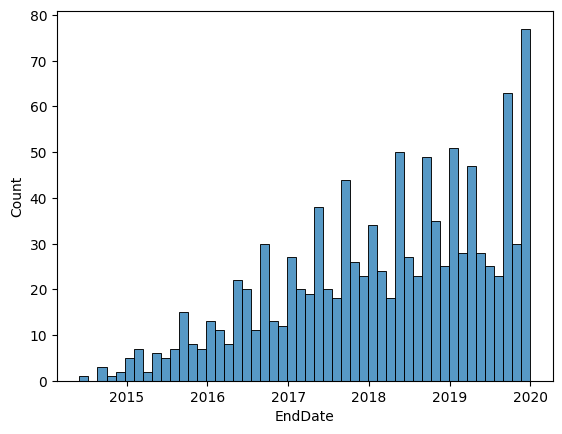

In [ ]:
sns.histplot(df.loc[df['EndDate'] != '2020-02-01', 'EndDate'], bins=50)

Число ушедших клиентов со временем растет, ведь растет и число клиентов. Также видно, что в дате окончания пользования услугами нету выбросов.

In [ ]:
df['BeginDate'].max()

Timestamp('2020-02-01 00:00:00')

In [ ]:
df[['END','EndDate']].groupby('EndDate').count().sort_values('END', ascending=False).head(10)

,END
EndDate,
2020-02-01,5942
2020-01-01,39
2019-12-01,38
2018-11-01,35
2019-09-01,32
2019-10-01,31
2019-11-01,30
2019-01-01,28
2018-09-01,28


И как видно большая часть людей числится клиентами, исходя из того, что мы ставили им дату 2020-02-01. А значит есть дисбаланс целевого признака END.

Посмотрим распределение ухода клиентов по месяцам года.

In [ ]:
df.loc[df['EndDate'] != '2020-02-01',['END','EndDate']].groupby(df['EndDate'].dt.month).count().sort_values('END', ascending=False)

,END,EndDate
EndDate,,
11,113,113
12,107,107
9,105,105
1,103,103
10,99,99
7,97,97
6,87,87
3,86,86
8,82,82


<Axes: >

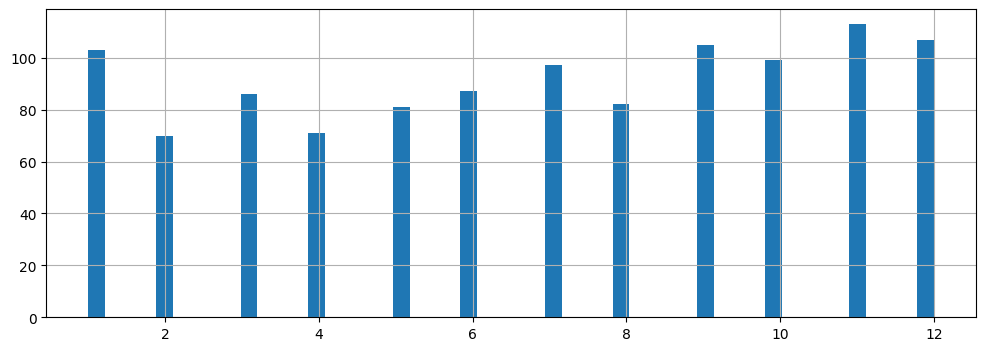

In [ ]:
df.loc[df['EndDate'] != '2020-02-01','EndDate'].dt.month.hist(bins=50, grid= True, figsize=(12,4))

Как видно, больше всего клиентов уходит осенью и в начале зимы, а также в начале лета.

<Axes: xlabel='gender', ylabel='Count'>

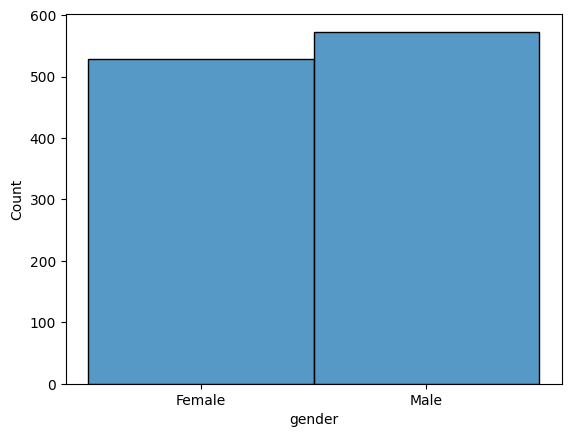

In [ ]:
sns.histplot(df.loc[df['EndDate'] != '2020-02-01', 'gender'], bins=50)

<Axes: xlabel='SeniorCitizen', ylabel='Count'>

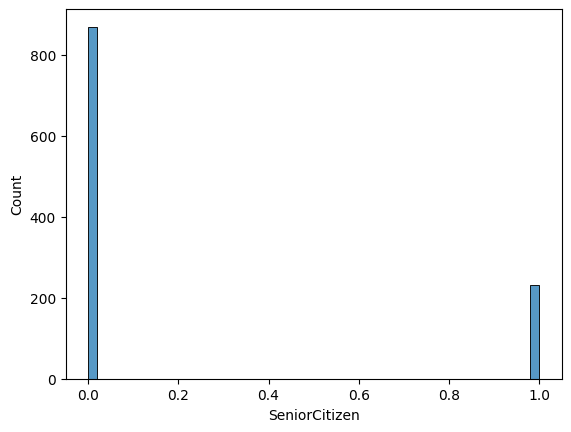

In [ ]:
sns.histplot(df.loc[df['EndDate'] != '2020-02-01', 'SeniorCitizen'], bins=50)

<Axes: xlabel='phone', ylabel='Count'>

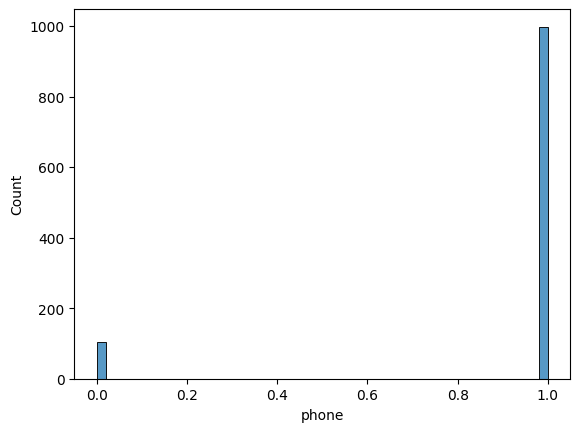

In [ ]:
sns.histplot(df.loc[df['EndDate'] != '2020-02-01', 'phone'], bins=50)

<Axes: xlabel='InternetService', ylabel='Count'>

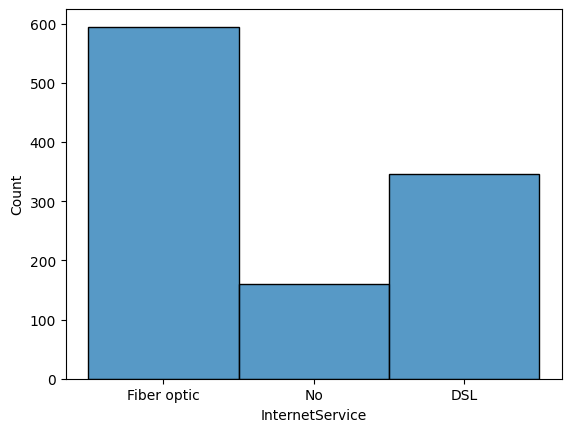

In [ ]:
sns.histplot(df.loc[df['EndDate'] != '2020-02-01', 'InternetService'], bins=50)

<Axes: >

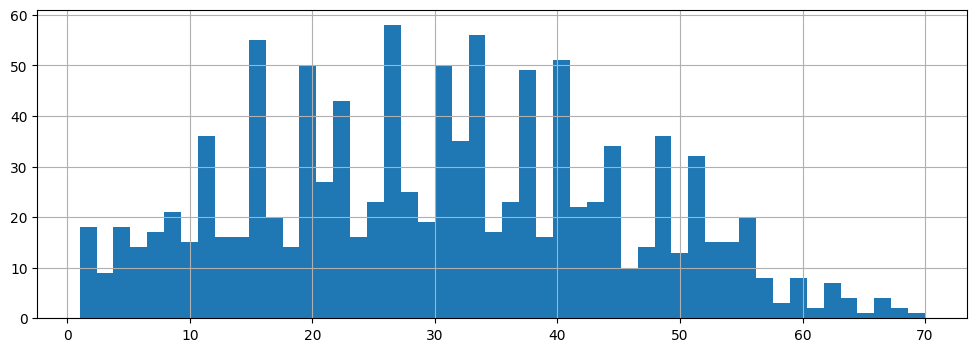

In [ ]:
df.loc[df['EndDate'] != '2020-02-01', 'cl_months'].hist(bins=50, grid= True, figsize=(12,4))

Распределение по числу месяцев, сколько человек является клиентом, выглядит нормально. В равной степени люди уходят у кого нету телефонной связи или интернета, а также в равной степени в зависимости от пола.

In [ ]:
round(df.loc[df['EndDate'] != '2020-02-01',['END','EndDate']]
      .groupby(df['EndDate'].dt.year).count().drop('EndDate',axis=1)/\
      df.loc[df['BeginDate'] != '2020-02-01',['END','BeginDate']]
      .groupby(df['BeginDate'].dt.year).count().drop('BeginDate',axis=1)*\
      100)

,END
2013,NaN
2014,1.0
2015,7.0
2016,18.0
2017,28.0
2018,28.0
2019,17.0
2020,17.0


Но в процентном отношении, числа ушедших клиентов к продолжающими быть клиентами, больше всего было в 17 и 18 годах, и сейчас ниже.

In [ ]:
df.drop(['SeniorCitizen', 'phone'], axis=1).corr(method='spearman')

<ipython-input-82-f413bb28eca2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.drop(['SeniorCitizen', 'phone'], axis=1).corr(method='spearman')


,MonthlyCharges,TotalCharges,END,cl_months,pay_to_day,cl_days
MonthlyCharges,1.000000,0.646556,0.164086,0.254110,0.973974,0.253513
TotalCharges,0.646556,1.000000,0.139681,0.877495,0.763261,0.877275
END,0.164086,0.139681,1.000000,0.065440,0.177935,0.061635
cl_months,0.254110,0.877495,0.065440,1.000000,0.394231,0.999972
pay_to_day,0.973974,0.763261,0.177935,0.394231,1.000000,0.393715
cl_days,0.253513,0.877275,0.061635,0.999972,0.393715,1.000000


<ipython-input-83-53ccfd085de5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.drop(['SeniorCitizen', 'phone'], axis=1).corr(method='spearman'))


<Axes: >

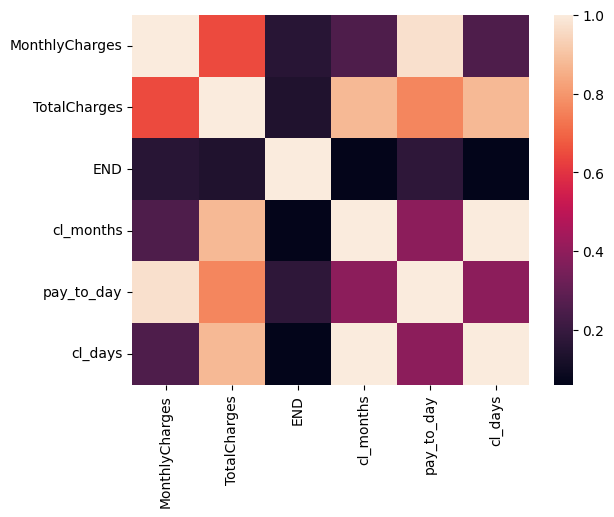

In [ ]:
sns.heatmap(df.drop(['SeniorCitizen', 'phone'], axis=1).corr(method='spearman'))

Сильнее всего уход зависит от платежей, и почти нету корреляции с тем пользуется ли клиент услугами телефонии, но это лишь числовые параметры, посмотрим на общую корреляцию.

In [ ]:
! pip install phik

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 11.2 MB/s eta 0:00:00


In [ ]:
import phik

inter_param = ['MonthlyCharges', 'TotalCharges', 'cl_months', 'cl_days', 'pay_to_day']

In [ ]:
df.drop(['customerID','BeginDate','EndDate'], axis = 1).phik_matrix(interval_cols = inter_param, bins=50)

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,END,cl_months,pay_to_day,cl_days
Type,1.000000,0.106860,0.277462,0.500064,0.568059,0.000000,0.086231,0.179736,0.147680,0.065498,...,0.152145,0.098884,0.137610,0.179999,0.066961,0.069608,0.094015,0.722131,0.526268,0.722055
PaperlessBilling,0.106860,1.000000,0.370495,0.459678,0.212585,0.000000,0.242133,0.013218,0.172593,0.252972,...,0.000000,0.196443,0.160796,0.055929,0.343524,0.325551,0.083398,0.098495,0.436871,0.098566
PaymentMethod,0.277462,0.370495,1.000000,0.479301,0.424978,0.000000,0.292725,0.243008,0.224903,0.339313,...,0.262911,0.282475,0.306866,0.272101,0.377209,0.378907,0.214832,0.425317,0.488313,0.425325
MonthlyCharges,0.500064,0.459678,0.479301,1.000000,0.749594,0.000000,0.301178,0.213955,0.180973,0.780277,...,0.563643,0.628108,0.666076,0.588171,0.810932,0.807297,0.232953,0.447042,0.959103,0.447504
TotalCharges,0.568059,0.212585,0.424978,0.749594,1.000000,0.067399,0.152487,0.389746,0.092871,0.576827,...,0.508141,0.604727,0.627309,0.533254,0.627286,0.628955,0.309366,0.874354,0.883424,0.874376
gender,0.000000,0.000000,0.000000,0.000000,0.067399,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.018397,0.009882,0.000000,0.000000,0.000000,0.000000,0.008581,0.000000,0.040034,0.000000
SeniorCitizen,0.086231,0.242133,0.292725,0.301178,0.152487,0.000000,1.000000,0.016992,0.324576,0.221313,...,0.057028,0.102065,0.090686,0.092565,0.163120,0.186141,0.086159,0.096868,0.286130,0.096425
Partner,0.179736,0.013218,0.243008,0.213955,0.389746,0.000000,0.016992,1.000000,0.652122,0.220101,...,0.221673,0.219223,0.238079,0.185993,0.193258,0.182011,0.226688,0.442869,0.279635,0.443152
Dependents,0.147680,0.172593,0.224903,0.180973,0.092871,0.000000,0.324576,0.652122,1.000000,0.033103,...,0.124945,0.031533,0.010416,0.096912,0.017331,0.058999,0.046871,0.198318,0.186927,0.198390
MultipleLines,0.065498,0.252972,0.339313,0.780277,0.576827,0.000000,0.221313,0.220101,0.033103,1.000000,...,0.151886,0.311403,0.309757,0.155739,0.392239,0.394553,0.261237,0.396832,0.758986,0.396681


<Axes: >

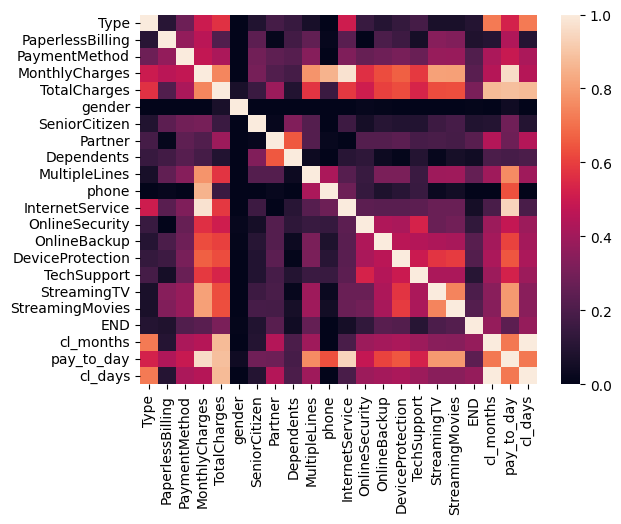

In [ ]:
sns.heatmap(df.drop(['customerID','BeginDate','EndDate'], axis = 1).phik_matrix(interval_cols = inter_param, bins=50))

Как видно из матрицы корреляции всех признаков, корреляции ухода клиента практически нету с признаками Гендера, Наличием иждивенцев и Наличием телефонии. Эти признаки мы уберем. Сильнее всего она у целевого признака END с признаками Итогового платежа, Числа месяцев пользования услугами клиентом, и Наличием многоканального подключения телефона. Но все в пределах нормы.

### Классификация клиентов

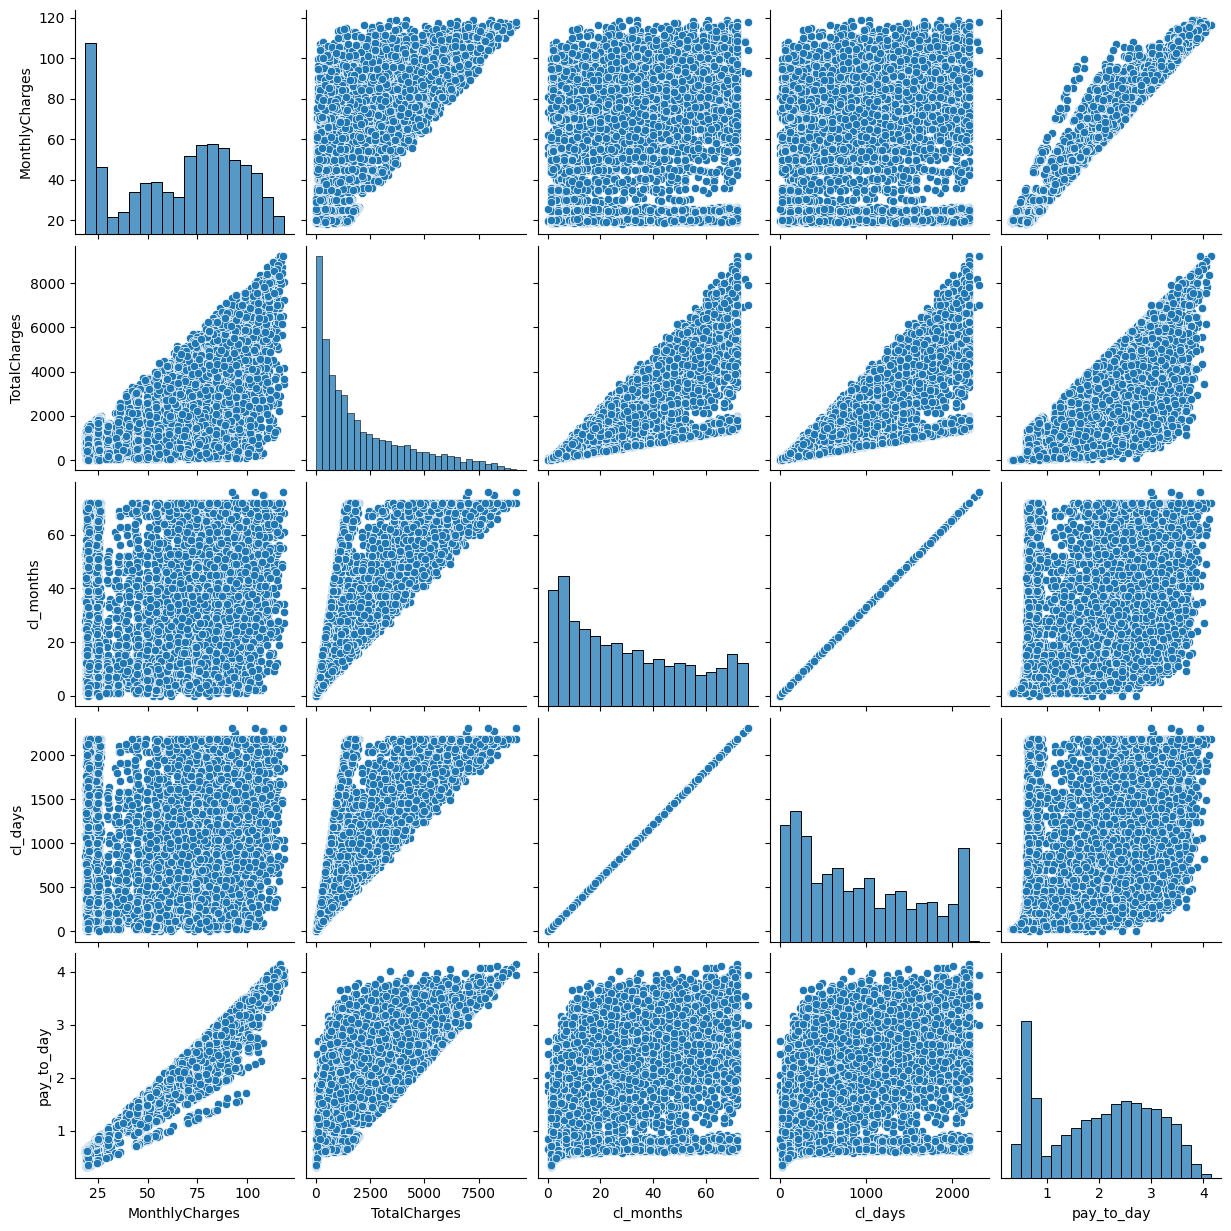

In [ ]:
sns.pairplot(df[inter_param], diag_kind='hist')

Как видно, нельзя выделить какие-то классы клиентов. Но посмотрим через кластеризацию.

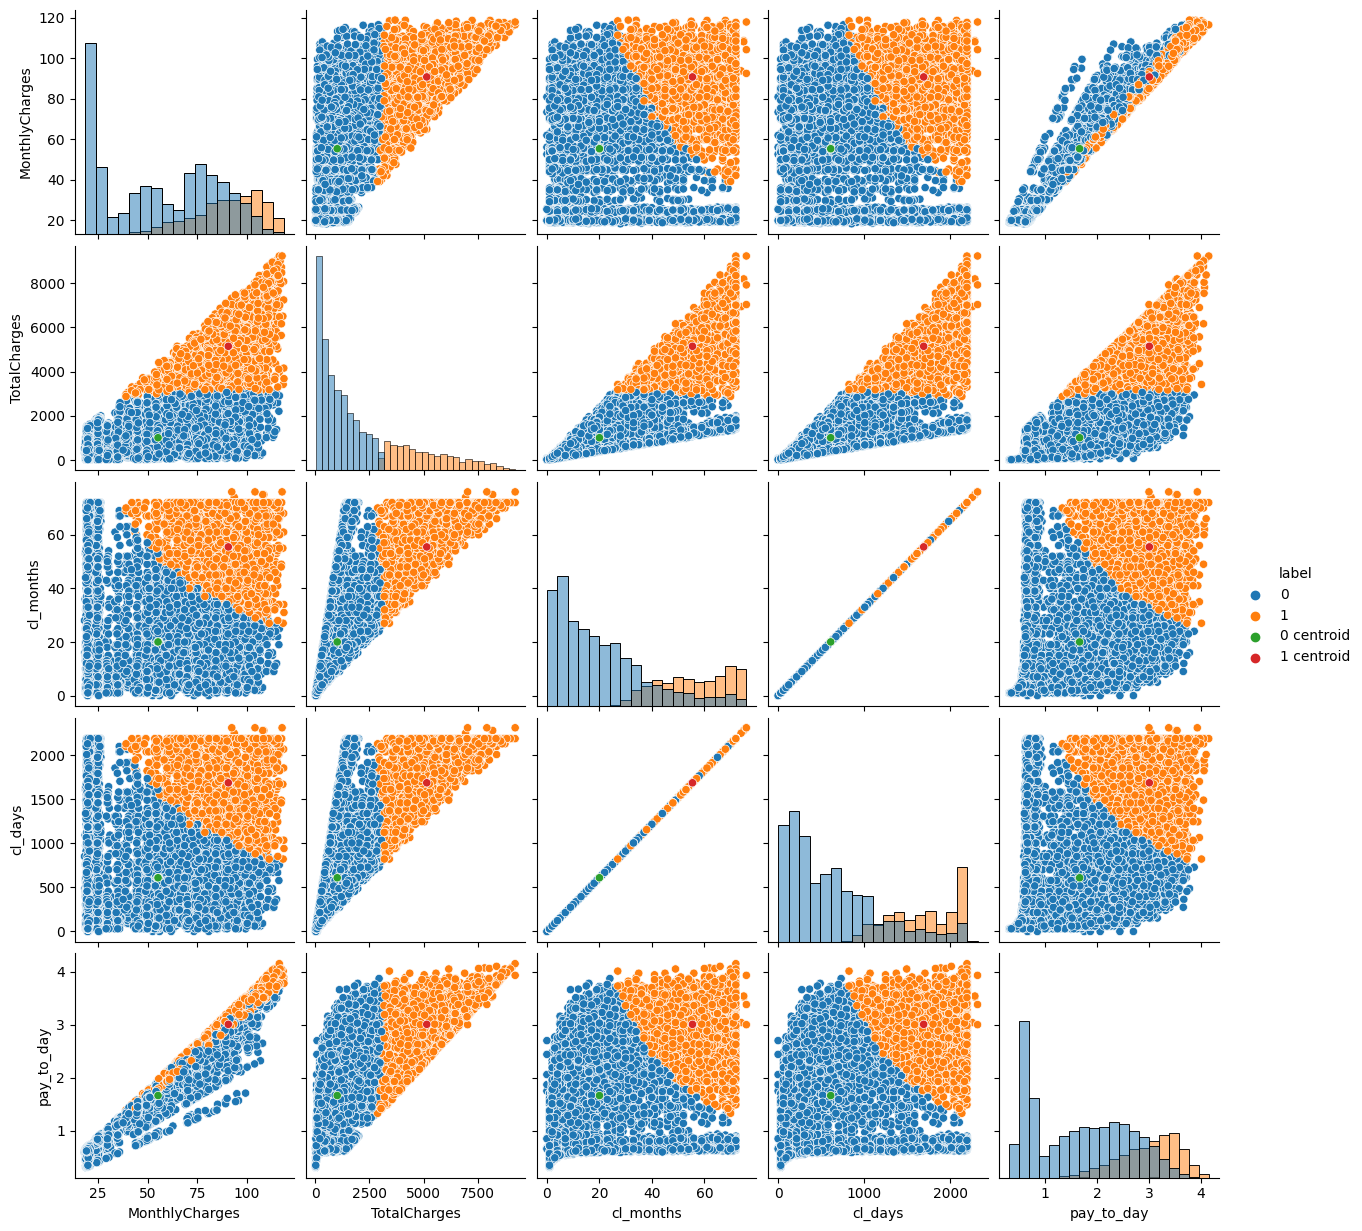

In [ ]:
from sklearn.cluster import KMeans

dff = pd.DataFrame(df[inter_param])
model = KMeans(n_clusters=2, random_state=RANDOM_STATE)
model.fit(dff)

centroids = pd.DataFrame(model.cluster_centers_, columns=dff.columns)
# Добавление столбца с номером кластера
dff['label'] = model.labels_.astype(str)
centroids['label'] = ['0 centroid', '1 centroid']
# Сброс индекса понадобится дальше
data_all = pd.concat([dff, centroids], ignore_index=True)

# Построение графика
sns.pairplot(data_all, hue='label', diag_kind='hist')

Как видно, можно выделить группу людей, кто долго является клиентом, и помесячные платежи у них высокие. Таких клиентов терять точно нельзя, и можно дать скидку всем кто пользуется услагми более 40 месяцев, и помесячная оплата у кого больше 70 уе или суммарный платеж выше 4000 уе.

<Axes: xlabel='END', ylabel='Count'>

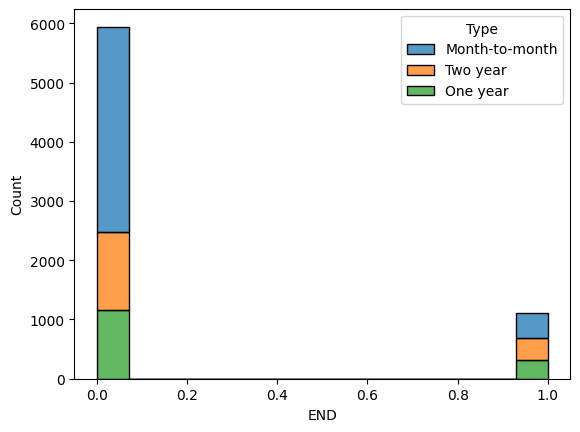

In [ ]:
sns.histplot(df, x='END', hue='Type', multiple="stack")

<Axes: xlabel='END', ylabel='count'>

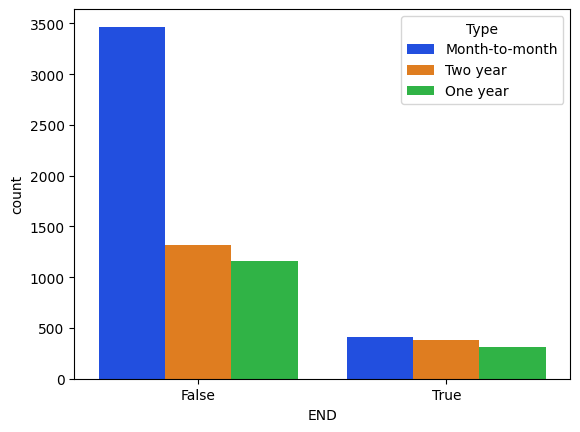

In [ ]:
sns.countplot(x='END', data = df, hue='Type', palette='bright')

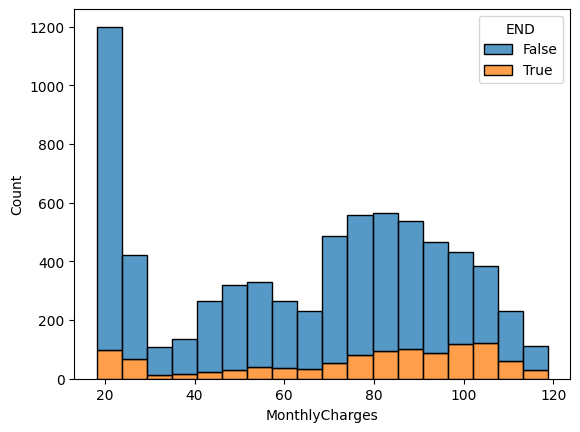

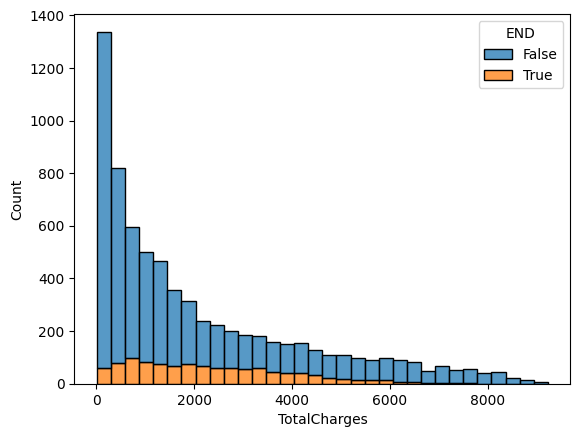

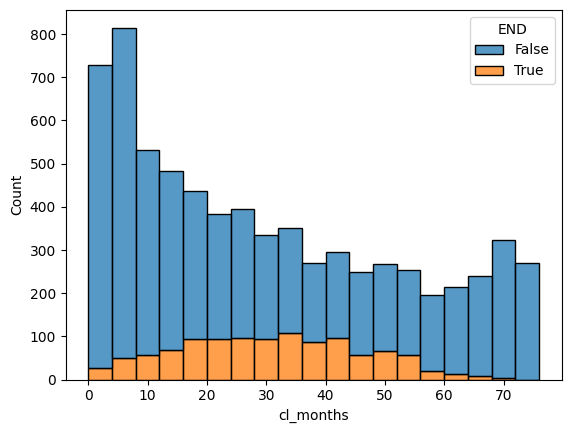

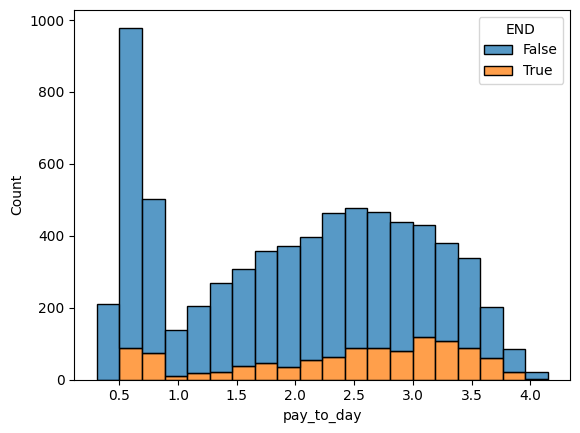

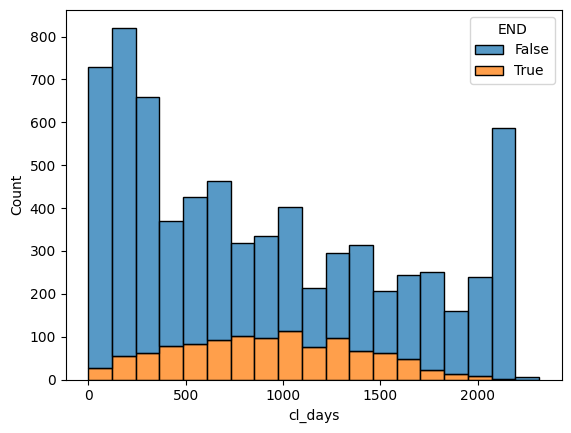

In [ ]:
for cat in (df[['MonthlyCharges','TotalCharges','cl_months','pay_to_day','cl_days']]).columns:
    sns.histplot(df, x=cat, hue='END', multiple="stack")
    plt.show()

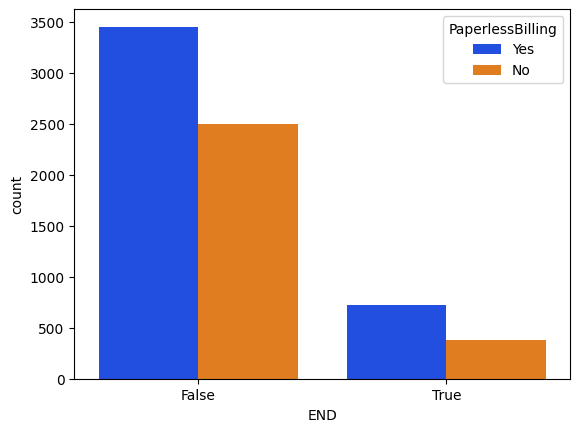

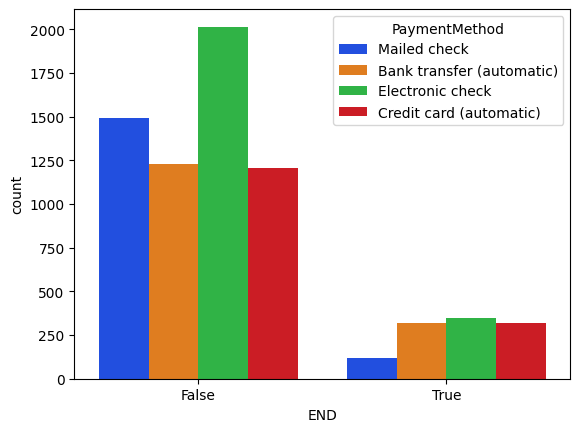

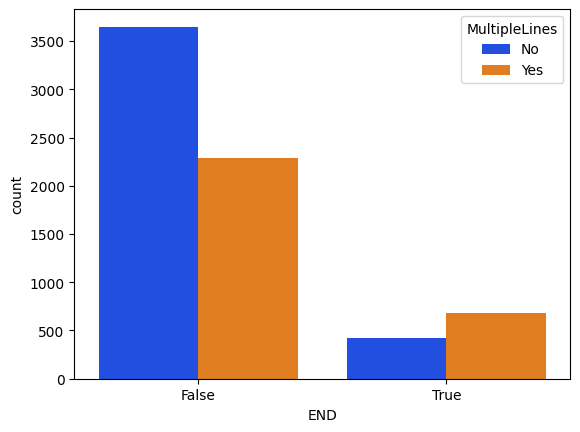

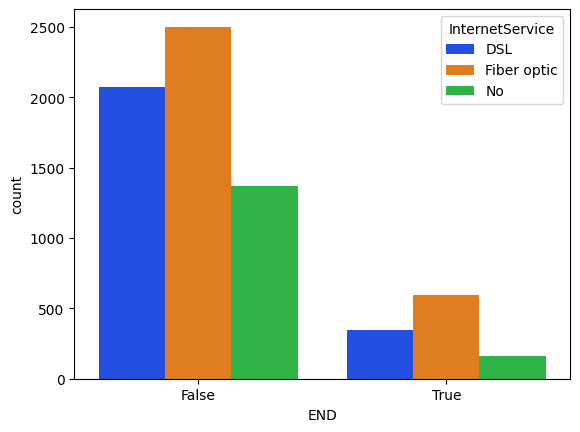

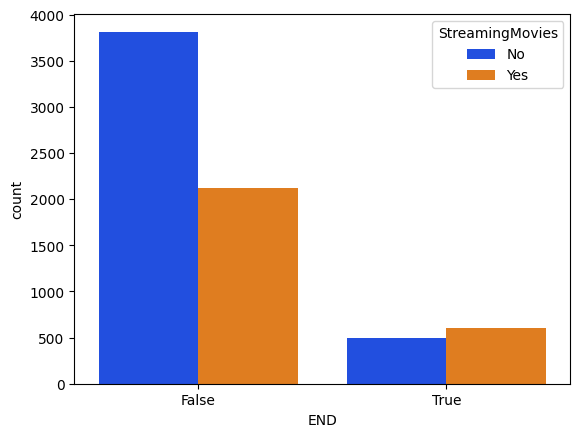

In [ ]:
for cat in (df[['PaperlessBilling','PaymentMethod','MultipleLines','InternetService','StreamingMovies']]).columns:
    sns.countplot(x='END', data = df, hue=cat, palette='bright')
    plt.show()

### Вывод EDA

Больше всего клиентов уходит осенью и в начале зимы, а также в начале лета.

В равной степени люди уходят у кого нету телефонной связи или интернета, а также в равной степени в зависимости от пола.

В процентном отношении, числа ушедших клиентов к продолжающими быть клиентами, больше всего было в 17 и 18 годах, и сейчас ниже.

Сильнее всего целевой признак зависит от признаков оплаты и от срока договора, что логично. А также от PaymentMethod(Метод оплаты), partner(наличие супруга), MultipleLines(Наличием многоканального подключения телефона), OnlineBackup и StreamingMovies.

Также модно выделить премиальных клиентов, кто долго пользуется услугами(более 40 месяцев), и помесячная оплата у кого больше 70 уе или суммарный платеж выше 4000 уе.

Гораздо больше неушедших среди тех, кто выбрал помесячную оплату, и чей платеж около 20уе в месяц. После того как человек был клиентом более 60 месяцев, практически нету тех, кто решил уйти, в основном решение об отказе от услуг люди начинают принимать после 5 месяцев пользования.

От нал или безнал расчетов практически не зависит решение об уходе, как и от интернет обслуживания.
Но среди методов оплаты, люди меньше уходят, кто оплачивает электронным способом или по емэйлу, без автоматических платежей.

Много ушедших среди тех, кто пользовалься MultipleLines(Наличием многоканального подключения телефона) и StreamingMovies. Среди не ушедших наоборот. Значит эти аспекты оказания услуг некачественные.

Однако, это всего лишь гипотезы.

## Создадим выборки и проведем кодирование

In [ ]:
from sklearn.model_selection import train_test_split
#,'gender', 'phone','Dependents','InternetService'
features = df.drop(['customerID','BeginDate','EndDate','END','gender', 'phone','Dependents'], axis=1)
target = df['END'] # целевая переменная

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=t_size, random_state=RANDOM_STATE)

print(features_train.shape, features_test.shape)

(5282, 18) (1761, 18)


In [ ]:
target_train = target_train.astype(int)

In [ ]:
target_test = target_test.astype(int)

Проведем кодирование категориальных признаков и масштабирование численных.

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7043 non-null   object 
 1   PaperlessBilling  7043 non-null   object 
 2   PaymentMethod     7043 non-null   object 
 3   MonthlyCharges    7043 non-null   float64
 4   TotalCharges      7043 non-null   float64
 5   SeniorCitizen     7043 non-null   int64  
 6   Partner           7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  cl_months         7043 non-null   int64  
 16  pay_to_day        7043 non-null   float64


In [ ]:
cat_param = features.select_dtypes(include='object').columns.to_list()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder_ohe = OneHotEncoder(handle_unknown='ignore', drop='first', sparse=False)
encoder_ohe.fit(features_train[cat_param])
features_train[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_train[cat_param])

# удаляем незакодированные категориальные признаки (изначальные колонки)
features_train = features_train.drop(cat_param, axis=1)

# энкодером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, кодируем тестовую
features_test[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_test[cat_param])

features_test = features_test.drop(cat_param, axis=1)

In [ ]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5282 entries, 1373 to 1264
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MonthlyCharges                         5282 non-null   float64
 1   TotalCharges                           5282 non-null   float64
 2   SeniorCitizen                          5282 non-null   int64  
 3   cl_months                              5282 non-null   int64  
 4   pay_to_day                             5282 non-null   float64
 5   cl_days                                5282 non-null   int64  
 6   Type_One year                          5282 non-null   float64
 7   Type_Two year                          5282 non-null   float64
 8   PaperlessBilling_Yes                   5282 non-null   float64
 9   PaymentMethod_Credit card (automatic)  5282 non-null   float64
 10  PaymentMethod_Electronic check         5282 non-null   float64
 11  P

In [ ]:
features_train.head()

,MonthlyCharges,TotalCharges,SeniorCitizen,cl_months,pay_to_day,cl_days,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),...,Partner_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
1373,90.95,7137.76,0,72,3.21,2191,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
183,89.70,6975.07,0,72,3.14,2191,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5506,80.05,2801.75,0,35,2.55,1067,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3442,83.85,2263.95,1,27,2.66,822,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
3814,82.15,6151.39,0,72,2.77,2191,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0


In [ ]:
#сменим тип данных на целочисленный у преобразованных категориальных признаков

cat_param2 = list(features_train.drop(inter_param, axis=1).columns)

In [ ]:
cat_param2

['SeniorCitizen',
 'Type_One year',
 'Type_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'Partner_Yes',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_Yes',
 'OnlineBackup_Yes',
 'DeviceProtection_Yes',
 'TechSupport_Yes',
 'StreamingTV_Yes',
 'StreamingMovies_Yes']

In [ ]:
for pris in cat_param2:
    features_train[pris] = features_train[pris].astype(int)
    features_test[pris] = features_test[pris].astype(int)

## Масштабирование

In [ ]:
'''
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(features_train)
features_train = pd.DataFrame(scaler.transform(features_train),columns=features_train.columns)
features_test = pd.DataFrame(scaler.transform(features_test),columns=features_test.columns)
pd.options.mode.chained_assignment = None
'''

'\nfrom sklearn.preprocessing import StandardScaler\n\nscaler = StandardScaler()\n\nscaler.fit(features_train)\nfeatures_train = pd.DataFrame(scaler.transform(features_train),columns=features_train.columns)\nfeatures_test = pd.DataFrame(scaler.transform(features_test),columns=features_test.columns)\npd.options.mode.chained_assignment = None\n'

# Обучение моделей

## Выбор лучшей модели для градиентного бустинга

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, \
                            roc_auc_score,\
                            precision_recall_curve,\
                            roc_curve


In [ ]:
!pip install xgboost

In [ ]:
# xgboost для классификации
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

model = XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=RANDOM_STATE)
n_scores = cross_val_score(model, features_train, target_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
print('ROC-AUC: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

ROC-AUC: 0.882 (0.025)


In [ ]:
!pip install lightgbm

In [ ]:
# lightgbm для классификации

from lightgbm import LGBMClassifier

model = LGBMClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=RANDOM_STATE)
n_scores = cross_val_score(model, features_train, target_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
print('ROC-AUC: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


ROC-AUC: 0.862 (0.024)


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 5.9 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(verbose=0, n_estimators=100)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=RANDOM_STATE)
n_scores = cross_val_score(model, features_train, target_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
print('ROC-AUC: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

ROC-AUC: 0.867 (0.024)


## XGB

In [ ]:
%%time
model_xgb = XGBClassifier()

param_dict = [{'learning_rate':[0.1, 0.2, 0.3],
                'random_state':[RANDOM_STATE],
               'max_bin':[5,10],
               'max_depth':[2,4,7],
               'max_leaves':[5,10],
               'n_estimators':[1000,1500],
               }]
gridxgb = GridSearchCV(model_xgb, param_dict, cv=10, scoring='roc_auc',n_jobs = -1)
gridxgb.fit(features_train, target_train)

print(gridxgb.best_params_)
print()
print(gridxgb.best_score_)

{'learning_rate': 0.2, 'max_bin': 5, 'max_depth': 2, 'max_leaves': 5, 'n_estimators': 1000, 'random_state': 30723}

0.9104873027185697
CPU times: user 1min 9s, sys: 12.4 s, total: 1min 21s
Wall time: 1h 25min 55s


## CatBoost

In [ ]:
#подбор весов
(df['END'].count() - df['END'].sum())/df['END'].sum()
#с подбором весов целевого класса результать чуть хуже был

5.396911898274296

In [ ]:
%%time
model_cb = CatBoostClassifier()

param_dict = [{'learning_rate':[0.2, 0.25, 0.3],
                'random_state':[RANDOM_STATE],
               'max_bin':[200,210,220],
               'depth':[1,2,3],
               'n_estimators':[800,900,1000],
               'verbose':[False]}]
gridcb = GridSearchCV(model_cb, param_dict, cv=30, scoring='roc_auc',n_jobs = -1)
gridcb.fit(features_train, target_train)

print(gridcb.best_estimator_)
print()
print(gridcb.best_params_)
print()
print(gridcb.best_score_)


{'depth': 2, 'learning_rate': 0.25, 'max_bin': 210, 'n_estimators': 900, 'random_state': 30723, 'verbose': False}

0.9251010599310376
CPU times: user 59.4 s, sys: 8.64 s, total: 1min 8s
Wall time: 1h 18min 2s


In [ ]:
#Wall time: 1h 16min 35s

print(gridcb.best_params_)
print()
print(gridcb.best_score_)

{'depth': 2, 'iterations': 1000, 'learning_rate': 0.3, 'max_bin': 200, 'random_state': 30723, 'verbose': False}

0.9228420311045072


## Модель леса

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier

model_forest = RandomForestClassifier()

param_d = [{'max_depth': list(range(9,13)),
            'n_estimators':[300, 500, 700],
            'class_weight':['balanced'],
            'min_samples_leaf': [2,3,5,7],
            'max_leaf_nodes': [100,150,200],
            'random_state':[RANDOM_STATE]}]
grid_forest = GridSearchCV(model_forest, param_d, cv=5, scoring='roc_auc', n_jobs = -1)
grid_forest.fit(features_train, target_train)

print(grid_forest.best_params_)
print()
print(grid_forest.best_score_)


{'class_weight': 'balanced', 'max_depth': 12, 'max_leaf_nodes': 150, 'min_samples_leaf': 3, 'n_estimators': 500, 'random_state': 30723}

0.8192130651468699
CPU times: user 8.09 s, sys: 987 ms, total: 9.08 s
Wall time: 10min 19s


In [ ]:
print(grid_forest.best_params_)
print()
print(grid_forest.best_score_)

{'class_weight': 'balanced', 'max_depth': 11, 'max_leaf_nodes': 150, 'min_samples_leaf': 5, 'n_estimators': 300, 'random_state': 30723}

0.8194094899269077


## Результат обучения моделей

In [ ]:
res_mod = pd.DataFrame({'ROC_AUC_Train':[0.91,0.925,0.82]}, index=['XGBClassifier','CatBoostClassifer','RandomForest'])

In [ ]:
res_mod

,ROC_AUC_Train
XGBClassifier,0.910
CatBoostClassifer,0.925
RandomForest,0.820


# Тест лучшей модели

In [ ]:
best_model = gridcb

In [ ]:
test_predict = best_model.predict_proba(features_test)[:, 1]

In [ ]:
roc_auc_score(target_test, test_predict)

0.9490240023807088

# Исследования качества модели

## Матрица ошибок

Confusion matrix, without normalization
[[1456   12]
 [ 105  188]]


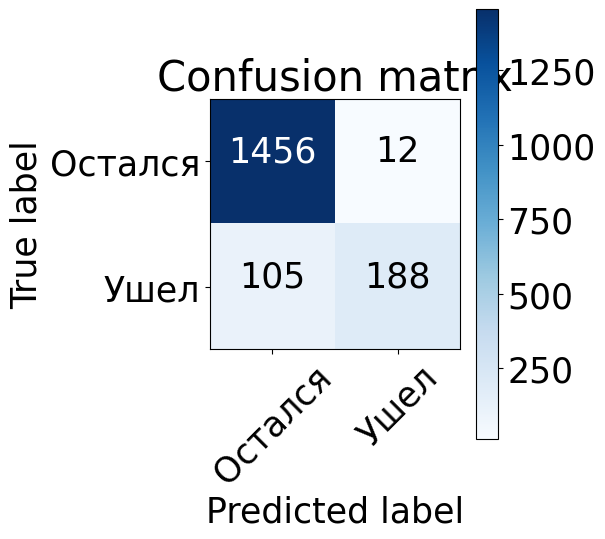

In [ ]:
# Воспользуемся функцией построения матрицы ошибок из документации sklearn
from matplotlib.pylab import rc, plot
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 25}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(target_test, best_model.predict(features_test))
plt.figure(figsize=(6, 6))
plot_confusion_matrix(cnf_matrix, classes=['Остался', 'Ушел'],
                      title='Confusion matrix')
plt.show()

TN | FP \
FN | TP

Модель ошибочно определила 105 человек, что они не ушли. А 12, что ушли. При выдаче, например промокода, не страшно выдать их лишним 12 людям, а вот что мы не выдали его 105 и они ушли, вот это страшно. Хуже всего, предсказать того кто ушел оставшимся, ведь нам надо определить именно уйдет клиент или нет.

## Подбор порога

Стандартный порог для перевода вероятности в классы  θ=0.5 .

Увеличивая порог, мы будем находить меньше тех, кто уйдет, но с большей точностью. В нашем случае значит нужно порог снизить.

In [ ]:
probs = best_model.predict_proba(features_test)
print(probs[:,1][:10])
classes = probs[:,1] > 0.5

print(classes[:10])

[0.98359984 0.00391684 0.00765293 0.00177782 0.01490741 0.19825227
 0.00139532 0.00259193 0.06054439 0.00909712]
[ True False False False False False False False False False]


In [ ]:
classes = probs[:,1] > 0.2

confusion_matrix(target_test, classes), roc_auc_score(target_test, classes)

(array([[1354,  114],
        [  53,  240]]),
 0.8707279761185146)

С порогом 0.2 мы определим 240 человек точно, кто уйдет. Однако, растет и FP, те кто не ушел, но мы определили что уйдут, и выдали им промокод. Тут уже стоит смотреть что выгоднее, выдать промокод лишним 114 людям, или потерять 53 клиента.

## ROC кривая

Одним из способов оценить модель в целом, не привязываясь к конкретному порогу, является AUC-ROC (или ROC AUC) — площадь (Area Under Curve) под кривой ошибок (Receiver Operating Characteristic curve ). Поэтому именно эту метрику мы и выбирали. Данная кривая представляет из себя линию от (0,0) до (1,1) в координатах True Positive Rate (TPR) и False Positive Rate (FPR)

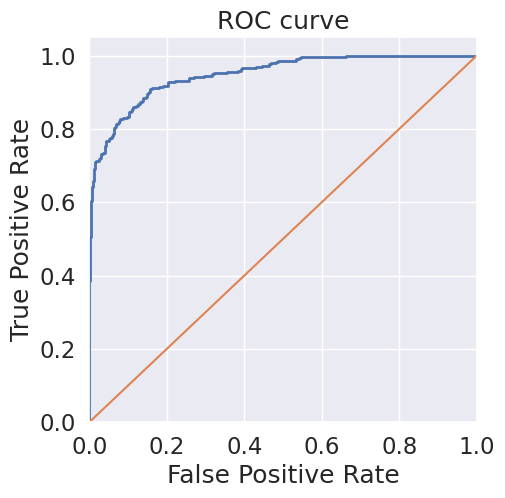

In [ ]:
#fpr = fp/(fp+tn)   0
#tpr = tp/(tp+fn)   1  recall (полнота)
fpr =  0
tpr =  1
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(5, 5))
fpr, tpr, thresholds = roc_curve(target_test, best_model.predict_proba(features_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()


## Проверка на адекватность через качество фиктивной модели

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_model = DummyClassifier(strategy='most_frequent', constant=1)
dummy_model.fit(features_train,target_train)
roc_auc = roc_auc_score(target_test, dummy_model.predict(features_test))
print(roc_auc)


0.5


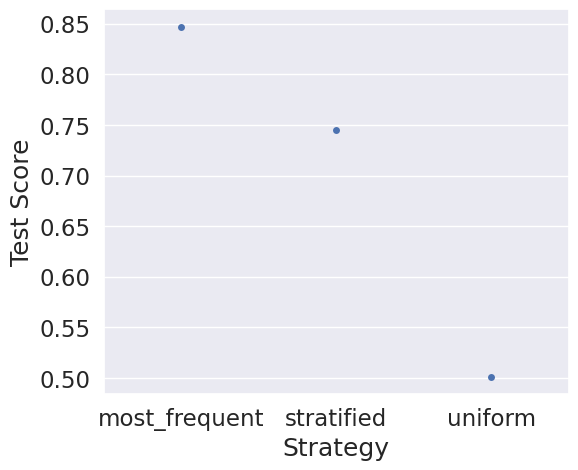

[0.8470276410450587, 0.7447936387731919, 0.5011359333585763]


In [ ]:
strategies = ['most_frequent', 'stratified', 'uniform']

test_scores = []
for s in strategies:
    mod = DummyClassifier(strategy = s, random_state = RANDOM_STATE)
    mod.fit(features_train, target_train)
    score = mod.score(features_train, target_train)
    test_scores.append(score)

plt.figure(figsize=(6, 5))
ax = sns.stripplot(x=strategies, y=test_scores)
ax.set(xlabel ='Strategy', ylabel ='Test Score')
plt.show()
print(test_scores)

На тренировочных данных модель давала адекватный результат.

## Исследование значимости признаков модели.

In [ ]:
vesa = best_model.best_estimator_.feature_importances_
name_priznak = features_test.columns

In [ ]:
vesa

array([ 8.52371811,  9.21661392,  0.30555035, 12.97009065,  5.10680793,
       51.00868024,  1.27033493,  2.62209204,  0.34008364,  0.3098915 ,
        0.28273821,  1.06406805,  2.40859735,  1.33213104,  0.48317123,
        0.        ,  0.06790875,  0.9038908 ,  0.74216194,  0.29074404,
        0.05746347,  0.69326181])

In [ ]:
df_ves = pd.DataFrame({'weights': vesa}, index = name_priznak).sort_values(by='weights',ascending=False)

In [ ]:
df_ves

,weights
cl_days,51.008680
cl_months,12.970091
TotalCharges,9.216614
MonthlyCharges,8.523718
pay_to_day,5.106808
Type_Two year,2.622092
Partner_Yes,2.408597
MultipleLines_Yes,1.332131
Type_One year,1.270335
PaymentMethod_Mailed check,1.064068


Как и было исследованно ранее, наибольший вес в признаках имеют сгенерированные признаки сроки договора с клиентами. А также признаки оплаты. За ними по важности для модели идут типы сроков оплаты, и наличие брака. А признак отсутствия интернет услуг вообще не влияет на результаты предсказаний.

## Исследование метрик

In [ ]:
from sklearn.metrics import accuracy_score,\
                            f1_score,\
                            precision_score,\
                            recall_score

In [ ]:
target_test.value_counts()

0    1468
1     293
Name: END, dtype: int64

Accuracy - это доля правильных ответов модели, самая понятная метрика. Однако не всегда ее разумно применять. Ведь она зависит от итогового признака, который мы определяем. И особенно плохо для несбалансированных классов, а у нас как раз этот случай.

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(target_test, best_model.predict(features_test))

0.9335604770017035

В нашей задаче нам интересно найти как можно больше ушедших клиентов, чтобы еще до ухода можно было на них повлиять.

Доля найденных ушедших среди всех ушедших - это метрика под названием полнота (recall).

In [ ]:
#recall
from sklearn.metrics import recall_score

recall_score(target_test, best_model.predict(features_test))

0.6416382252559727

Парная к полноте метрика - точность (precision). Она показывает долю правильных ответов модели среди тех объектов, которые модель отнесла к положительному классу.

В нашем случае precision менее важна, чем recall, так как если мы скажем, что клиент уйдет, а он не ушел - хуже не будет. Но и лишний раз давать скидки не стоит, поэтому обычно оптимизируют целевую метрику recall, при условии, что парная метрика не слишком маленькая.

In [ ]:
#precision
from sklearn.metrics import precision_score

precision_score(target_test, best_model.predict(features_test))

0.94

Иногда также применяют F-меру, это своего рода среднее между recall и presion, позволяющая котнролировать обе метрики, и смотреть на общую картину качества модели.

In [ ]:
#f-мера
f1_score(target_test, best_model.predict(features_test))

0.7626774847870182

# Вывод

В целом все данные были в порядке, понадобилось лишь их вручную объединить. В целевом пизнаке также был дисбаланс класса, что мы учли при работе. Добавление признаков срока договора с клиентами хорошо улучшило метрики модели и результаты предсказаний, однако итоговый порог классификации стоит уменьшить до 0.2. На тестовых данных значение ROC_AUC было 0.949.

С фервраля по май 2014 года, и во вторую половину 2019 был большой рост числа новых клиентов. Если проводились ПР компании, то они были самыми эффективными. Больше всего клиентов уходит осенью и в начале зимы, а также в начале лета, стоит проводить сезонные акции.

Онлайн безопасностью и тех поддержкой пользуются значительно меньше людей.
В равной степени люди уходят у кого нету телефонной связи или интернета, а также в равной степени в зависимости от пола.
После того как человек был клиентом более 60 месяцев, практически нету тех, кто решил уйти, в основном решение об отказе от услуг люди начинают принимать после 5 месяцев пользования.
Много ушедших среди тех, кто пользовалься MultipleLines(Наличием многоканального подключения телефона) и StreamingMovies. Среди не ушедших наоборот. Значит эти аспекты оказания услуг некачественные.\
Также модно выделить премиальных клиентов, кто долго пользуется услугами(более 40 месяцев), и помесячная оплата у кого больше 70 уе или суммарный платеж выше 4000 уе.

# Сохранение модели

In [ ]:
import pickle

with open('model_telecom.pickle', 'wb') as f:
    pickle.dump(best_model, f)

#а так модель можно загрузить из файла:
#with open('model.pickle', 'rb') as f:
#    model = pickle.load(f)

# Отчет по работе


Повторим план
1.   Провести предварительный анализ по данным
2.   Сделать вывод на основе анализа данных
3.   Провести полноценную предобработку данных, соединить таблицы по Id Клиента. Добавить нужные признаки. провести EDA
4.   Разделить на тренировочную и тестовую выборки. Преобразовать категориальные признаки методом OHE. А численные через масштабирование Scaler.
5.   Настроить и обучить 3 модели через кросс-валидацию и оценить их, выбрать лучшую
6.   Применить лучшую модель к тестовой выборке и оценить результат.
7.   Сделать итоговый вывод

Из плана были выполнены все пункты. Но масштабирование не понадобилось, оно не используется для моделей деревьев и бустинга, я пробовал его добавить, но результаты были с ним чуть хуже(на тысячную долю). Моделей я обучил 3(XGB,CatBoost,RandomForest), при чем для бустинга предварительно выбрал 2 из 3х бустинговых моделей без настроек, просто скорингом.


Наибольшую трудность в проекте доставило слабое начальное качество модели. Данным не хватало корреляции с целевым признаком. Было решено введением дополнительных численных признаков на основе имеющихся. Таким образом, мы искусственно увеличили суммарную корреляцию для лучшего поиска моделью зависимостей и подбора весов.

Проект был выполнен по следующим шагами - предварительный анализ, предобработка, полноценный анализ, подготовка выборок, подбор и тест моделей, проверка модели, анализ результатов, вывод.


Лучшей моделью по результатам стала модель c градиентным бустингом CatBoost, впрочем она не сильно лучше классического XGBClassifer. Параметры нашей итоговой модели были слеующими:\
'depth': 2 \
'learning_rate': 0.25 \
 'max_bin': 210 \
'n_estimators': 900

Метрика ROC_AUC лучшей модели на тестовой выборке: &ensp; 0.949

Размер тестовой выборки был взят 0.25 от общего датафрейма.\
Параметр random_state был равен 30723.

При выполнении предобработки данных сначала были заполнены пропуски в итоговых счетах новых клиентов месячным значением. Затем понадобилось объединение таблиц в один датафрейм по id клиентов, при этом, на основе появляющихся пропусков были сделаны новые логические признаки, например phone-наличие телефонии. Сами пропуски были заполнены логически-соответстующим значением, в нашем случае 'No', то есть у клиентов не было той илииной услуги. После объединения, на основе дат, были созданы 3 новых признака-число месяцев договора, число дней договора и подневная тарификация.

Из начального набора данных, после предобработки, были убраны признаки с датами(потому что их целесообразно использовать в основном для временных рядов, что не являлось нашей задачей) и идентификаторы клиентов, от этих признаков была бы сильная корреляция, и они не помогли бы решению задачи. Но на основе них, был собран итоговый датафрейм и добавлены новые признаки. А именно число месяцев и дней, сколько человек является клиентом. И признак с подневной оплатой. Также, из итогового набора данных были убраны признаки gender и Dependents, поскольку, как было обнаружено при анализе данных, целевой признак от них слабо зависел. Аналогично я поступил с созданным признаком phone(есть ли услуги телефонии у клиента или нету), по аналогичной причине.

Признаки, которые использовались для обучения, после кодирования категориальных признаков:\
 &ensp; 'MonthlyCharges',\
&ensp;  'TotalCharges', \
&ensp;  'cl_months', \
&ensp;  'cl_days', \
&ensp;  'pay_to_day',\
&ensp; 'SeniorCitizen',\
&ensp; 'Type_One year',\
&ensp; 'Type_Two year',\
&ensp; 'PaperlessBilling_Yes',\
&ensp; 'PaymentMethod_Credit card (automatic)',\
&ensp; 'PaymentMethod_Electronic check',\
&ensp; 'PaymentMethod_Mailed check',\
&ensp; 'Partner_Yes',\
&ensp; 'MultipleLines_Yes',\
&ensp; 'InternetService_Fiber optic',\
&ensp; 'InternetService_No',\
&ensp; 'OnlineSecurity_Yes',\
&ensp; 'OnlineBackup_Yes',\
&ensp; 'DeviceProtection_Yes',\
&ensp; 'TechSupport_Yes',\
&ensp; 'StreamingTV_Yes',\
&ensp; 'StreamingMovies_Yes'

Целевым был признак 'END', сгенерированный на основе дат окончания пользования услугами клиентами. Также, искусственно созданными признаками были:\
&ensp;  'cl_months', &ensp;- срок договора в месяцах\
&ensp;  'cl_days', &ensp;&ensp;&ensp;- срок договора в днях\
&ensp;  'pay_to_day' &ensp;- примерная подневная оплата, с поправкой на следующий за оплатой месяц(+30дней)

Из начального датасета, после предобработки, были убраны признаки:\
&ensp;  'BeginDate', \
&ensp;  'EndDate', \
&ensp;  'customerID'

При этом, признак InternetService_No можно было тоже убрать, так как при ислледовании значимости признаков модели, его значение было нулевым.
Наибольший вес в признаках имеют признаки, с указанными весами:\
&ensp;cl_days	&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; 51.008680\
&ensp;cl_months	&ensp;&ensp;&ensp;&ensp;&ensp; 12.970091\
&ensp;TotalCharges	&ensp;&ensp;&ensp; 9.216614\
&ensp;MonthlyCharges	&ensp;8.523718\
&ensp;pay_to_day	&ensp;&ensp;&ensp;&ensp;&ensp; 5.106808\
&ensp;Type_Two year &ensp;&ensp;2.622092\
&ensp;Partner_Yes	&ensp;&ensp;&ensp;&ensp; 2.408597
